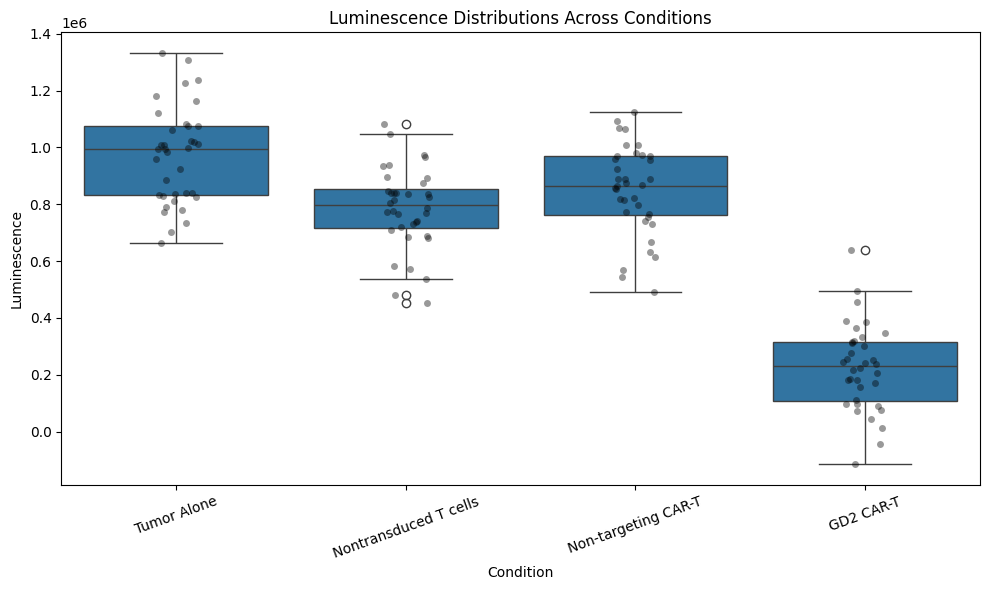

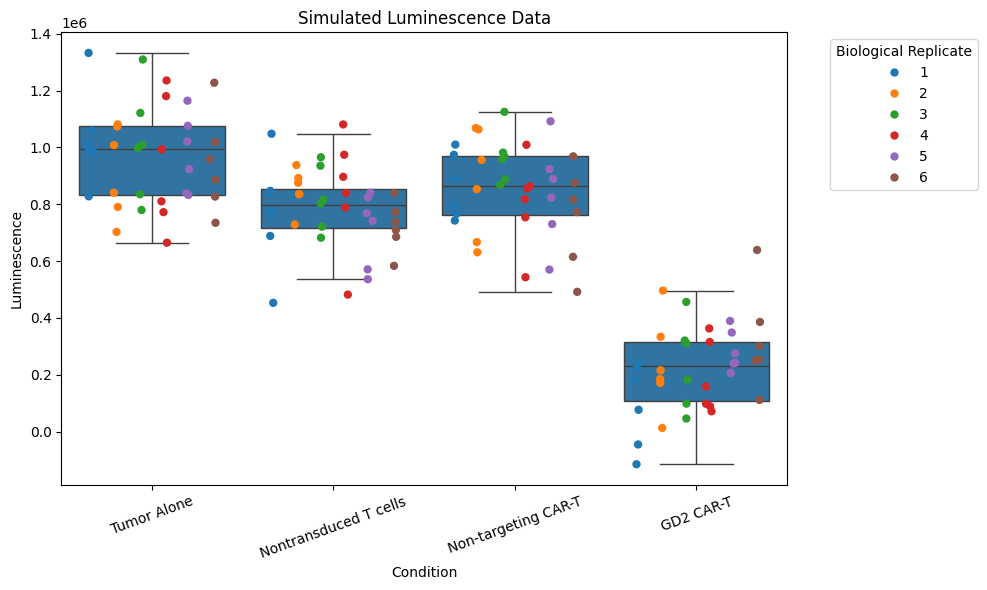

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# SIMULATION PARAMETERS
# -----------------------------
n_bio = 6      # biological replicates
n_tech = 6     # technical replicates per biological replicate

# baseline luminescence for tumor alone
mean_tumor = 1e6
sd_tumor = 1.5e5

# fold reductions for co-culture conditions
fold_nontransduced = 0.8        # slight killing
fold_control = 0.9              # weak non-targeting CAR
fold_gd2 = 0.2                  # strong CAR-T effect

# condition dictionary for easy looping
conditions = {
    "Tumor Alone": 1.0,
    "Nontransduced T cells": fold_nontransduced,
    "Non-targeting CAR-T": fold_control,
    "GD2 CAR-T": fold_gd2
}

# -----------------------------
# SIMULATE DATA
# -----------------------------
rows = []

for bio in range(1, n_bio + 1):
    for cond, fold in conditions.items():
        # mean for this biological replicate
        mean = mean_tumor * fold
        # generate technical replicates
        values = np.random.normal(loc=mean, scale=sd_tumor, size=n_tech)

        for tech, v in enumerate(values, start=1):
            rows.append({
                "BiologicalReplicate": bio,
                "TechnicalReplicate": tech,
                "Condition": cond,
                "Luminescence": v
            })

df = pd.DataFrame(rows)

# -----------------------------
# PLOT DISTRIBUTIONS
# -----------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Condition", y="Luminescence")
sns.stripplot(data=df, x="Condition", y="Luminescence", color="black", alpha=0.4)
plt.title("Luminescence Distributions Across Conditions")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

# -----------------------------
# ONE BOX PLOT WITH DOT COLORS BY BIOLOGICAL REPLICATE
# -----------------------------
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Condition", y="Luminescence", fliersize=0)

# Make a color palette with 6 distinct colors (one per biological replicate)
palette = sns.color_palette("tab10", n_bio)

sns.stripplot(
    data=df,
    x="Condition",
    y="Luminescence",
    hue="BiologicalReplicate",
    palette=palette,
    dodge=True,
    size=6
)

plt.title("Simulated Luminescence Data")
plt.xticks(rotation=20)
plt.legend(title="Biological Replicate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

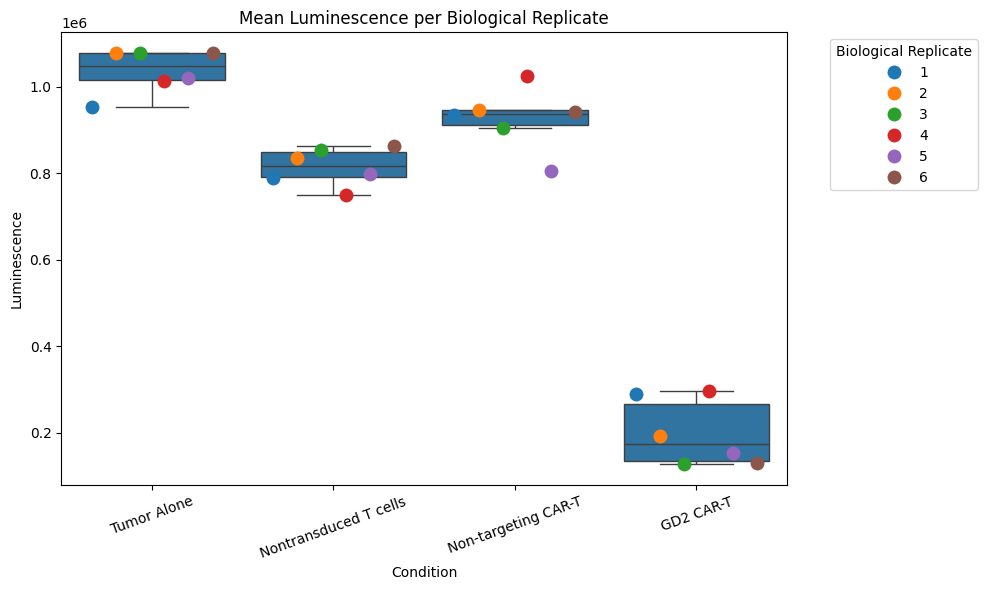

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# SIMULATION PARAMETERS
# -----------------------------
n_bio = 6     # biological replicates
n_tech = 6    # technical replicates

# baseline luminescence
mean_tumor = 1e6
sd_tumor   = 1.5e5

# fold reductions
fold_nontransduced = 0.8
fold_control       = 0.9
fold_gd2           = 0.2

# ----------------------------------------
# REORDERED CONDITIONS (your requested order)
# ----------------------------------------
conditions = {
    "Tumor Alone": 1.0,
    "Nontransduced T cells": fold_nontransduced,
    "Non-targeting CAR-T": fold_control,
    "GD2 CAR-T": fold_gd2
}

# -----------------------------
# SIMULATE TECHNICAL DATA
# -----------------------------
rows = []

for bio in range(1, n_bio + 1):
    for cond, fold in conditions.items():
        mean = mean_tumor * fold
        values = np.random.normal(loc=mean, scale=sd_tumor, size=n_tech)

        for tech, v in enumerate(values, start=1):
            rows.append({
                "BiologicalReplicate": bio,
                "TechnicalReplicate": tech,
                "Condition": cond,
                "Luminescence": v
            })

df = pd.DataFrame(rows)

# -----------------------------
# MEAN PER BIOLOGICAL REPLICATE
# -----------------------------
df_means = (
    df.groupby(["BiologicalReplicate", "Condition"])
      .Luminescence
      .mean()
      .reset_index()
)

# Ensure plotting uses your desired condition order
df_means["Condition"] = pd.Categorical(
    df_means["Condition"],
    categories=list(conditions.keys()),
    ordered=True
)

# -----------------------------
# PLOT: boxplot + colored biological replicates
# -----------------------------
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df_means,
    x="Condition",
    y="Luminescence",
    fliersize=0
)

palette = sns.color_palette("tab10", n_bio)

sns.stripplot(
    data=df_means,
    x="Condition",
    y="Luminescence",
    hue="BiologicalReplicate",
    palette=palette,
    dodge=True,
    size=10
)

plt.title("Mean Luminescence per Biological Replicate")
plt.xticks(rotation=20)
plt.legend(title="Biological Replicate", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
